In [13]:
import json
import pandas as pd
import sklearn
import seaborn

# read the file
df = pd.read_json('all_data_array.json')

In [14]:
# remove invalid rows
df.head()
df = df[df.branches_count != -1]
df = df[df.contributors_count != -1]
#df[['COL2', 'COL4']] = df[['COL2', 'COL4']].astype(int)

type_data = str(df.dtypes).split()
for i in xrange(0,len(type_data),2):
    column_name = type_data[i]
    column_type = type_data[i+1]
    if column_type == 'bool':
        df[column_name] = df[column_name].astype(int)

df.describe()

,branches_count,commits_count,contributors_count,forks_count,has_downloads,has_homepage,has_issues,has_pages,has_wiki,id,milestones_count,open_issues_count,projects_count,pull_requests_count,release_count,size,stars_count,watchers_count
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,8.980000e+02,898.000000,898.000000,898.000000,898.000000,898.000000,8.980000e+02,898.000000,898.000000
mean,17.234967,4037.897550,158.375278,2291.994432,0.954343,0.678174,0.955457,0.355234,0.721604,1.576191e+07,1.516704,240.591314,0.259465,37.397550,64.027840,6.485151e+04,11094.739421,11094.739421
std,63.189875,12353.407935,322.869780,4012.750466,0.208856,0.467437,0.206414,0.478851,0.448459,1.649912e+07,2.705593,537.714878,0.979468,180.420984,302.190078,2.034484e+05,10140.083277,10140.083277
min,1.000000,1.000000,0.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.314000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+01,5327.000000,5327.000000
25%,2.000000,352.750000,30.000000,719.250000,1.000000,0.000000,1.000000,0.000000,0.000000,2.143211e+06,0.000000,26.000000,0.000000,4.000000,3.000000,2.440000e+03,6252.250000,6252.250000
50%,4.000000,1003.500000,71.000000,1394.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.055169e+07,1.000000,84.000000,0.000000,13.000000,23.000000,9.376000e+03,8331.000000,8331.000000
75%,10.000000,2799.750000,174.000000,2599.750000,1.000000,1.000000,1.000000,1.000000,1.000000,2.340553e+07,2.000000,225.750000,0.000000,33.000000,61.750000,4.371050e+04,12266.250000,12266.250000
max,980.000000,252695.000000,5640.000000,87195.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.090548e+07,30.000000,9148.000000,13.000000,5000.000000,7020.000000,2.842284e+06,197985.000000,197985.000000


In [15]:
# add legitity 
df['is_legit'] = 1
non_legit = set()
for legit, name, lang ,counter in zip(df.is_legit, df.name, df.languages, range(df.languages.size)):
    if len(lang) == 0:
        non_legit.add(name)
        df.set_value(counter,'is_legit',0)
    counter += 1

In [16]:
def remove_outliners(dataframe, cols, lower, higher):
    quantiles = []
    for col in cols:
        quant_df = dataframe[col].quantile([lower,higher])
        low, high = quant_df.iloc[0], quant_df.iloc[1]
        quantiles.append((low, high))
    for col, (low, high) in zip(cols, quantiles):
        dataframe = dataframe[(dataframe[col] >= low) & (dataframe[col] <= high)]
    return dataframe

In [17]:
# remove all the outliers
target_columns = ['branches_count', 'commits_count', 'contributors_count', 'forks_count', 'milestones_count', 'open_issues_count','pull_requests_count', 'release_count', 'size', 'stars_count', 'watchers_count']
no_outliners_df = remove_outliners(df, target_columns, 0.05, 0.95)
df = no_outliners_df

In [18]:
df.describe()

,branches_count,commits_count,contributors_count,forks_count,has_downloads,has_homepage,has_issues,has_pages,has_wiki,id,milestones_count,open_issues_count,projects_count,pull_requests_count,release_count,size,stars_count,watchers_count,is_legit
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,6.761726,1581.348968,101.632270,1688.497186,0.971857,0.677298,0.975610,0.405253,0.716698,1.415719e+07,1.127580,138.887430,0.181989,19.363977,33.634146,21537.718574,9590.060038,9590.060038,0.917448
std,8.469842,1953.244506,93.465465,1242.983253,0.165535,0.467949,0.154402,0.491402,0.451025,1.471892e+07,1.425681,155.150892,0.605965,20.332822,35.789476,37618.722150,3968.504992,3968.504992,0.275462
min,1.000000,86.000000,8.000000,337.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.393000e+03,0.000000,4.000000,0.000000,0.000000,0.000000,411.000000,5461.000000,5461.000000,0.000000
25%,2.000000,415.000000,35.000000,760.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.281775e+06,0.000000,34.000000,0.000000,4.000000,5.000000,2493.000000,6441.000000,6441.000000,1.000000
50%,4.000000,902.000000,71.000000,1315.000000,1.000000,1.000000,1.000000,0.000000,1.000000,9.639981e+06,1.000000,84.000000,0.000000,12.000000,22.000000,7146.000000,8374.000000,8374.000000,1.000000
75%,7.000000,1888.000000,140.000000,2196.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.139387e+07,2.000000,190.000000,0.000000,28.000000,52.000000,23696.000000,11658.000000,11658.000000,1.000000
max,54.000000,13832.000000,535.000000,6567.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.979875e+07,6.000000,933.000000,5.000000,107.000000,179.000000,269764.000000,25760.000000,25760.000000,1.000000


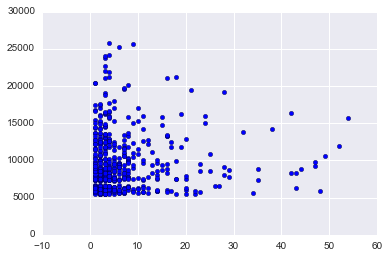

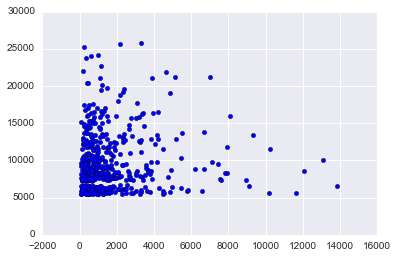

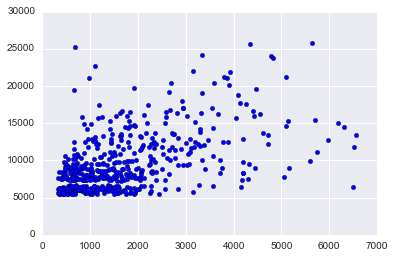

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(df['branches_count'], df['stars_count'])
plt.show()
plt.scatter(df['commits_count'], df['stars_count'])
plt.show()
plt.scatter(df['forks_count'], df['stars_count'])
plt.show()

In [25]:
legit_df = df[df['is_legit'] == 1]
no_legit_df = df[df['is_legit'] == 0]

In [26]:
# focus on one language
legit_df.describe()

,branches_count,commits_count,contributors_count,forks_count,has_downloads,has_homepage,has_issues,has_pages,has_wiki,id,milestones_count,open_issues_count,projects_count,pull_requests_count,release_count,size,stars_count,watchers_count,is_legit
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,4.890000e+02,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.0
mean,6.728016,1577.881391,101.969325,1699.742331,0.969325,0.676892,0.973415,0.398773,0.701431,1.428642e+07,1.108384,140.327198,0.179959,19.748466,33.073620,20969.983640,9632.224949,9632.224949,1.0
std,8.640690,1937.668386,94.630651,1240.956436,0.172612,0.468143,0.161031,0.490147,0.458099,1.479989e+07,1.391761,155.654459,0.583523,20.574438,35.127909,36832.428897,3993.301404,3993.301404,0.0
min,1.000000,86.000000,8.000000,337.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.655400e+04,0.000000,4.000000,0.000000,0.000000,0.000000,411.000000,5461.000000,5461.000000,1.0
25%,2.000000,419.000000,35.000000,774.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.328523e+06,0.000000,34.000000,0.000000,5.000000,5.000000,2411.000000,6439.000000,6439.000000,1.0
50%,4.000000,902.000000,70.000000,1362.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.005794e+07,1.000000,84.000000,0.000000,13.000000,22.000000,7060.000000,8407.000000,8407.000000,1.0
75%,7.000000,1888.000000,142.000000,2204.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.141320e+07,2.000000,194.000000,0.000000,28.000000,51.000000,23587.000000,11764.000000,11764.000000,1.0
max,54.000000,13832.000000,535.000000,6567.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.979875e+07,6.000000,933.000000,5.000000,107.000000,179.000000,269764.000000,25612.000000,25612.000000,1.0


In [21]:
def merge_describe_df(df1, df2, row_list):
    """
    Enter two dataframes and the rows you want to keep.
    The input dataframe order determines row order in output.
    """
    ddf1 = df1.describe()
    mean_df1_row = ddf1.iloc[row_list] # extracts the rows listed in the list
    ddf2 = df2.describe()
    mean_df2_row = ddf2.iloc[row_list]
    mean_df = mean_df1_row.append(mean_df2_row)
    return mean_df

merge_describe_df(no_legit_df, legit_df, [1]) # 1 for mean, 2 for std ....


,branches_count,commits_count,contributors_count,forks_count,has_downloads,has_homepage,has_issues,has_pages,has_wiki,id,milestones_count,open_issues_count,projects_count,pull_requests_count,release_count,size,stars_count,watchers_count,is_legit
mean,7.136364,1619.886364,97.886364,1563.522727,1.000000,0.681818,1.000000,0.477273,0.886364,1.272088e+07,1.340909,122.886364,0.204545,15.090909,39.863636,27847.318182,9121.454545,9121.454545,0.0
mean,6.728016,1577.881391,101.969325,1699.742331,0.969325,0.676892,0.973415,0.398773,0.701431,1.428642e+07,1.108384,140.327198,0.179959,19.748466,33.073620,20969.983640,9632.224949,9632.224949,1.0


In [22]:
def has_lang(lang_name):
    """
    Specify a language name to only analyze repositories for that language.
    Outputs dataframe for that language.
    """
    df['has_' + lang_name] = df['languages'].apply(lambda a: lang_name in a)
    lang_df = df[df['has_' + lang_name]]
    return lang_df

print (len(has_lang('CSS')), len(has_lang('C')))
x = merge_describe_df(has_lang('Python'), has_lang('JavaScript'), [1])
x

(232, 47)


,branches_count,commits_count,contributors_count,forks_count,has_downloads,has_homepage,has_issues,has_pages,has_wiki,id,milestones_count,open_issues_count,projects_count,pull_requests_count,release_count,size,stars_count,watchers_count,is_legit
mean,6.923077,2233.25641,115.217949,1662.923077,0.961538,0.679487,0.974359,0.358974,0.756410,1.593565e+07,1.089744,143.115385,0.307692,19.192308,25.384615,29380.384615,9011.487179,9011.487179,0.910256
mean,7.441077,1752.47138,103.491582,1613.020202,0.976431,0.801347,0.993266,0.471380,0.734007,1.310642e+07,1.255892,161.245791,0.228956,20.936027,39.326599,23924.367003,9680.848485,9680.848485,0.905724


In [ ]:
# building lniear regression model
import numpy as np
from sklearn.linear_model import Ridge as lt

df.columns
df.shape
df = df.reindex(np.random.permutation(df.index))

features = [ 'forks_count']
x_feature_train = df[features][:450]
y_feature_train = df['stars_count'][:450]
x_feature_test = df[features][450:]
y_feature_test = df['stars_count'][450:]
print x_feature.shape, y_feature.shape
regr = lt()
regr.fit(x_feature_train, y_feature_train)